<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

## Lab on NNDL Part 1: Tensorflow Basic

### Tensors

Tensors are multi-dimensional arrays with a uniform type

In [ ]:
import tensorflow as tf

##Question 1


### Create a rank-0 tensor
- A "scalar" is called "rank-0" tensor
- the tensor should contain value 99.99

In [ ]:
value=tf.constant(99.99)

In [ ]:
tf.rank(value)

<tf.Tensor: shape=(), dtype=int32, numpy=0>

In [ ]:
value

<tf.Tensor: shape=(), dtype=float32, numpy=99.99>

### Create a rank-1 tensor

- A "vector" (list) is called "rank-1" tensor [9,8,7,6,5]
- A vector has one axis

In [ ]:
value_2= tf.constant([9,8,7,6,5])

In [ ]:
print(value_2)

tf.Tensor([9 8 7 6 5], shape=(5,), dtype=int32)


### Add 7 to all the elements of the above created tensor
- Use Broadcasting

In [ ]:
value1 = tf.add(value_2, 7)
print(value1)


tf.Tensor([16 15 14 13 12], shape=(5,), dtype=int32)


### Create a rank-2 tensor
[[1, 2, 3], [ 4,5,6]]
- A "matrix"  "is called rank-2" tensor
- It has 2 axes

In [ ]:
value_3= tf.constant([[1, 2, 3], [ 4,5,6]])
print(value_3)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


### Change the shape of the above created tensor to shape (3,2)

In [ ]:
value_3=tf.reshape(value_3, [3, 2])
print(value_3)

tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32)


### Check the dtype, number of axes and the shape of tensor

In [ ]:
print("dtype : ", value_3.dtype)
print("Shape : ", value_3.shape)


dtype :  <dtype: 'int32'>
Shape :  (3, 2)


- Tensors can have more axes, like rank-3 or rank-4 tensor

##Lab on NNDL Part 2: Cars selling price prediction

### Data Set -
Domain: Finance, Business 
Data: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv

The data contains various features of used cars.

#### Features

1. year

2. selling_price: Price at which it was sold (**Target Feature**)

3. km_driven

4. fuel

5. seller_type

6. transmission

7. Owner

8. mileage

9. engine

10. max_power

11. seats

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

##Objective

Predict the selling price of used cars based on the given features

## Steps to perform:

#### 1. Import important Libraries
#### 2. Import Dataset and exploration
#### 3. Data Pre-processing
#### 4. Training a Neural Network Model
#### 5. Evaluating the model
#### 6. Conclusion


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


### Import important libraries

In [ ]:
import pandas as pd
import numpy as np

## Question 1

### Load the data
- Load the data, check the shape of data

In [ ]:
from google.colab import files
files.upload()

Saving car_data-1.csv to car_data-1.csv


{'car_data-1.csv': b'year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats\n2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0\n2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0\n2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0\n2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0\n2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0\n2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,5.0\n2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,5.0\n2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,4.0\n2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,5.0\n2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,5.0\n2014,500000

In [ ]:
df=pd.read_csv("car_data-1.csv")

In [ ]:
df.shape

(8128, 11)

## Question 2

### Preprocess the data
- Convert mileage, engine and max_power to numerical by extract numerical values from the strings
- Label Encode: 'owner' column
- One Hot Encode: 'fuel','seller_type','transmission' columns
- Drop all the instances with null values

In [ ]:
df.head(10)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,5.0
6,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,5.0
7,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,4.0
8,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,5.0
9,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,5.0


In [ ]:
def map_num(num):
    try:
        if type(num) == str:
            return float(num.split()[0])
        else:
            return num
    except:
        return np.nan
df[['mileage','engine','max_power']] = df[['mileage','engine','max_power']].applymap(map_num)


In [ ]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


In [ ]:
df.dtypes

year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

In [ ]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [ ]:
o = {'First Owner':1, 'Second Owner':2, 'Third Owner':3,
       'Fourth & Above Owner':4, 'Test Drive Car':5}
df['owner'] = df['owner'].map(o)
df.head()


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, dtype=np.int64)
cat_col = ['fuel','seller_type','transmission']
z = ohe.fit_transform(df[cat_col])
encoded_data = pd.DataFrame(z,columns=ohe.get_feature_names(cat_col))
encoded_data.head()


,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,0,1,0,0,0,1,0,0,1
1,0,1,0,0,0,1,0,0,1
2,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,1,0,0,1
4,0,0,0,1,0,1,0,0,1


In [ ]:
df1= df.drop(columns=cat_col,axis=1)
final_df = pd.concat([df1,encoded_data],axis=1)
final_df.head()


,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,2014,450000,145500,1,23.40,1248.0,74.00,5.0,0,1,0,0,0,1,0,0,1
1,2014,370000,120000,2,21.14,1498.0,103.52,5.0,0,1,0,0,0,1,0,0,1
2,2006,158000,140000,3,17.70,1497.0,78.00,5.0,0,0,0,1,0,1,0,0,1
3,2010,225000,127000,1,23.00,1396.0,90.00,5.0,0,1,0,0,0,1,0,0,1
4,2007,130000,120000,1,16.10,1298.0,88.20,5.0,0,0,0,1,0,1,0,0,1


In [ ]:
final_df.isnull().sum()


year                              0
selling_price                     0
km_driven                         0
owner                             0
mileage                         221
engine                          221
max_power                       216
seats                           221
fuel_CNG                          0
fuel_Diesel                       0
fuel_LPG                          0
fuel_Petrol                       0
seller_type_Dealer                0
seller_type_Individual            0
seller_type_Trustmark Dealer      0
transmission_Automatic            0
transmission_Manual               0
dtype: int64

In [ ]:
final_df.dropna(axis=0, inplace=True)


In [ ]:
final_df.head()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,2014,450000,145500,1,23.40,1248.0,74.00,5.0,0,1,0,0,0,1,0,0,1
1,2014,370000,120000,2,21.14,1498.0,103.52,5.0,0,1,0,0,0,1,0,0,1
2,2006,158000,140000,3,17.70,1497.0,78.00,5.0,0,0,0,1,0,1,0,0,1
3,2010,225000,127000,1,23.00,1396.0,90.00,5.0,0,1,0,0,0,1,0,0,1
4,2007,130000,120000,1,16.10,1298.0,88.20,5.0,0,0,0,1,0,1,0,0,1


In [ ]:
final_df.shape

(7906, 17)

## Question 3

### Split the data and then scale the data
- Split the data into ratio of 75:25 with random state=12
- Perform standard scaling on X_train and X_test data


In [ ]:
from sklearn.model_selection import train_test_split
x = final_df.drop('selling_price', axis=1)
y = final_df['selling_price']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=12)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((5929, 16), (1977, 16), (5929,), (1977,))

In [ ]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



## Question 4

### Create a Deep Neural Network Model for Regression
- Initialize a Sequential model
- Add 3 hidden layer with activation relu (Number of neurons = 64,128,32 respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input, BatchNormalization
from keras.utils.vis_utils import plot_model


### Check model summary and visualize the model

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                1088      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

## Question 5

### Compile the model

- Compile the model
- Use "adam" optimizer
- for calculating loss, use mean absolute error
- use R2 score (coefficient of determination) as the metric

In [ ]:
from keras import backend as K
def r_2_score(y_true, y_pred):
    SS_resid =  K.sum(K.square( y_true-y_pred )) 
    SS_total = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_resid/(SS_total + K.epsilon()))


In [ ]:
from sklearn.metrics import r2_score
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=[r_2_score])


Other metrics can also be used to track the learning of the model:

To learn different metrics for classification and regression visit the following link:

Link: https://keras.io/api/metrics/#usage-with-compile-amp-fit

### Train your model

- epochs: 1000
- batch size: 32
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10,restore_best_weights=True,mode='min')
history = model.fit(x_train, y_train,batch_size=32,
                    epochs=1000, verbose=1,
                    validation_data=(x_test, y_test), callbacks=callback)



Epoch 1/1000
186/186 [==============================] - 4s 4ms/step - loss: 643446.3389 - r_2_score: -1.3210 - val_loss: 648760.5625 - val_r_2_score: -1.0157
Epoch 2/1000
186/186 [==============================] - 1s 3ms/step - loss: 628541.7000 - r_2_score: -1.0872 - val_loss: 549483.9375 - val_r_2_score: -0.6731
Epoch 3/1000
186/186 [==============================] - 1s 3ms/step - loss: 498972.6930 - r_2_score: -0.6382 - val_loss: 354540.4062 - val_r_2_score: 0.0960
Epoch 4/1000
186/186 [==============================] - 1s 3ms/step - loss: 323049.6367 - r_2_score: 0.2360 - val_loss: 259106.9688 - val_r_2_score: 0.4924
Epoch 5/1000
186/186 [==============================] - 1s 3ms/step - loss: 233940.0109 - r_2_score: 0.5233 - val_loss: 228358.8594 - val_r_2_score: 0.6041
Epoch 6/1000
186/186 [==============================] - 1s 3ms/step - loss: 217105.2252 - r_2_score: 0.6089 - val_loss: 213532.1562 - val_r_2_score: 0.6435
Epoch 7/1000
186/186 [==============================] - 1s 

## Question 6

### Evaluate the model
- Evaluate the model on test data
- Visualize the model's learning

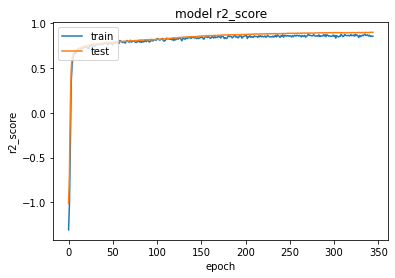

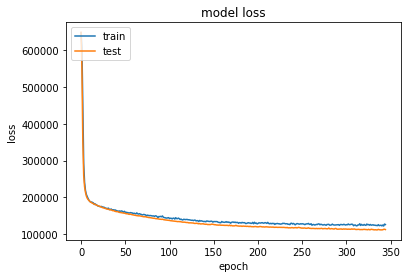

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['r_2_score'])
plt.plot(history.history['val_r_2_score'])
plt.title('model r2_score')
plt.ylabel('r2_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


- Hint: The R2 score will get affected by batch size. 

**Batch Size**: Number of samples considered in one iteration

### Check the R2 score on complete test data

In [ ]:
y_pred = model.predict(x_test)
print(r2_score(y_test,y_pred))


0.9366209685420068


### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss

In [ ]:
check_point = tf.keras.callbacks.ModelCheckpoint('./checkpoint', monitor='val_loss',save_best_only=True,save_freq='epoch')
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True,mode='min')
history = model.fit(x_train,y_train,batch_size=16,epochs=200,verbose=1,validation_data=(x_test,y_test),callbacks=[callback,check_point])


Epoch 1/200
371/371 [==============================] - 1s 3ms/step - loss: 123227.3203 - r_2_score: 0.8085 - val_loss: 111420.5000 - val_r_2_score: 0.8453
INFO:tensorflow:Assets written to: ./checkpoint/assets
Epoch 2/200
371/371 [==============================] - 1s 3ms/step - loss: 123650.9766 - r_2_score: 0.8200 - val_loss: 112114.3047 - val_r_2_score: 0.8446
Epoch 3/200
371/371 [==============================] - 1s 3ms/step - loss: 124113.3125 - r_2_score: 0.8145 - val_loss: 113162.0000 - val_r_2_score: 0.8476
Epoch 4/200
371/371 [==============================] - 1s 3ms/step - loss: 124732.5547 - r_2_score: 0.8138 - val_loss: 113127.7188 - val_r_2_score: 0.8465
Epoch 5/200
371/371 [==============================] - 1s 3ms/step - loss: 125039.9453 - r_2_score: 0.8136 - val_loss: 111963.1797 - val_r_2_score: 0.8443
Epoch 6/200
371/371 [==============================] - 1s 3ms/step - loss: 125017.3906 - r_2_score: 0.8016 - val_loss: 111779.9375 - val_r_2_score: 0.8429
Epoch 7/200
371

### Compile the model

- Compile the model
- Use "adam" optimizer 
- for calculating loss, use mean absolute error
- use R2 score (coefficient of determination) as the metric

### Train your model

- epochs: 1000
- batch size: 16
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model
- Add checkpoints to save the model after every epoch


### Check the R2 score on complete test data

### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss

### Create another Deep Neural Network Model for Regression to experiment with other hyper-parameters
- Initialize a Sequential model
- Add a batch normalization layer
- Intialize weights using HeUniform with seed = 7
- Add 4 hidden layer with activation relu (Number of neurons = 256,128,64,32 in each layer respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


### Compile the model

- Compile the model
- Use "adam" optimizer with learning rate = 0.002
- for calculating loss, use mean squared error
- use R2 score (coefficient of determination) as the metric

### Train your model

- epochs: 1000
- batch size: 64
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model



### Check the R2 score on complete test data

### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss